<a href="https://www.kaggle.com/code/wonduk/eda-lstm-classification-on-clothing-reviews?scriptVersionId=159637981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color:#b2182b; font-family:monospace; color: white; padding: 14px; line-height: 1;border-radius:20px">🛒 EDA & LSTM Classification on Women's Clothing Reviews</div>

<!-- marker_color = ['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#d1e5f0','#92c5de','#4393c3','#2166ac'] -->

![image](https://storage.googleapis.com/kaggle-datasets-images/11827/16290/140ca3b71ec51512dcac444c57583f25/dataset-cover.jpg?t=2018-02-03-20-33-18)

## <div style="text-align: left;background-color:#d6604d; font-family:monospace; color: white; padding: 14px; line-height: 1; border-radius:10px"> About Dataset📁</div>

<h4>This dataset includes <mark>23486 rows</mark> and <mark>10 columns</mark>. Each row corresponds to a customer review, and includes the variables:</h4>

* <b>Clothing ID</b>: Integer Categorical variable that refers to the <mark><b>specific piece</b></mark> being reviewed.
* <b>Age</b>: Positive Integer variable of the <mark><b>reviewers age</b></mark>.
* <b>Title</b>: String variable for the <mark><b>title of the review</b></mark>.
* <b>Review Text</b>: String variable for the <mark><b>review body</b></mark>.
* <b>Rating</b>: Positive Ordinal Integer variable for the <mark><b>product score</b></mark> granted by the customer from <b><mark>1 Worst</mark></b>, to <mark><b>5 Best</b></mark>.
* <b>Recommended IND</b>: Binary variable stating where the customer recommends the product where <mark><b>1 is recommended</b></mark>, <mark><b>0 is not recommended</b></mark>.
* <b>Positive Feedback Count</b>: Positive Integer documenting the <mark><b>number</b></mark> of other customers <mark><b>who found this review positive</b></mark>.
* <b>Division Name</b>: Categorical name of the <mark><b>product high level division</b></mark>.
* <b>Department Name</b>: Categorical name of the product <mark><b>department name</b></mark>.
* <b>Class Name</b>: Categorical name of the <mark><b>product class name</b></mark>.

## <div style="text-align: left;background-color:#d6604d; font-family:monospace; color: white; padding: 14px; line-height: 1; border-radius:10px"> Notebook Objectives🔎</div>

<h4>Goal of the notebook is to:</h4> 

1. 📊Explore <b><mark>every features</mark></b> in the dataset; <br>

2. 🔍<b><mark>Department Analysis </mark></b>(by <b>Age & Rate</b>);<br>

3. 📝<b><mark>Text Analysis</mark></b> (by <b>Recommended or not</b>);

4. 📈 📉<b><mark>Modeling</mark></b> (using <b>Bidirection LSTM, GloVe Embedding</b>)

## <div style="text-align: left;background-color:#d6604d; font-family:monospace; color: white; padding: 14px; line-height: 1; border-radius:10px"> Table of Contents📂 </div>

<a id="top"></a>
 
   * [1. Import Necessary Libraries](#1)
   * [2. Univariate Analysis](#2)
    - [2.1. Explore each Numeric Columns](#2.1)
        - [2.1.1. Age Distribution](#2.1.1)
        - [2.1.2. Rating & Recommended IND](#2.1.2)
        - [2.1.3. Positive Feedback Count](#2.1.3)
        - [2.1.4. Text Length by Recommended IND](#2.1.4)
    - [2.2. Categorical Columns](#2.2)
        - [2.2.1. Category of clothes: Department Name & Class Name](#2.2.1)
        - [2.2.2. Text](#2.2.2)
   * [3. Department Name Analysis](#3)
       - [3.1. Department by Age](#3.1)  
       - [3.2. Department by Rate](#3.2)  
   * [4. Text by Recommended IND(Ajectives)](#4)
   * [5. Text Preprocessing](#5)
       - [5.1. Define Preprocessing Function](#5.1)
       - [5.2. Train-Test Split](#5.2)
       - [5.3. Tokenization, Sequencing and Padding](#5.3)
       - [5.4. GloVe Embedding](#5.4)
   * [6. Text Classification(LSTM Model)](#6)
       - [6.1. Define & Train Model](#6.1)
       - [6.2. Model Evaluation](#6.2)
           - [6.2.1. Compare AUC & Loss Score](#6.2.1)
           - [6.2.2. Compare each Scores](#6.2.2)



# <div style="text-align: center; background-color:#b2182b; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Import Necessary Libraries</div>

In [1]:
# dataframe
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot
import missingno as msno
from wordcloud import WordCloud
from PIL import Image

# request
import requests

# tensorflow, for NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout

# NLTK, NLP Libraries
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

# sklearn, for preprocessing & scoring
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


<h4> Read Dataframe, and explore it's <u>shape</u> & <u>distribution</u> of missing values:</h4>

In [2]:
# read dataframe
df = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
print('Shape of DataFrame(before preprocess): ',df.shape,'\n')
df.head(2)

Shape of DataFrame(before preprocess):  (23486, 11) 



,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


Text(0.5, 1.0, 'Distribution of Missing Value (Before)')

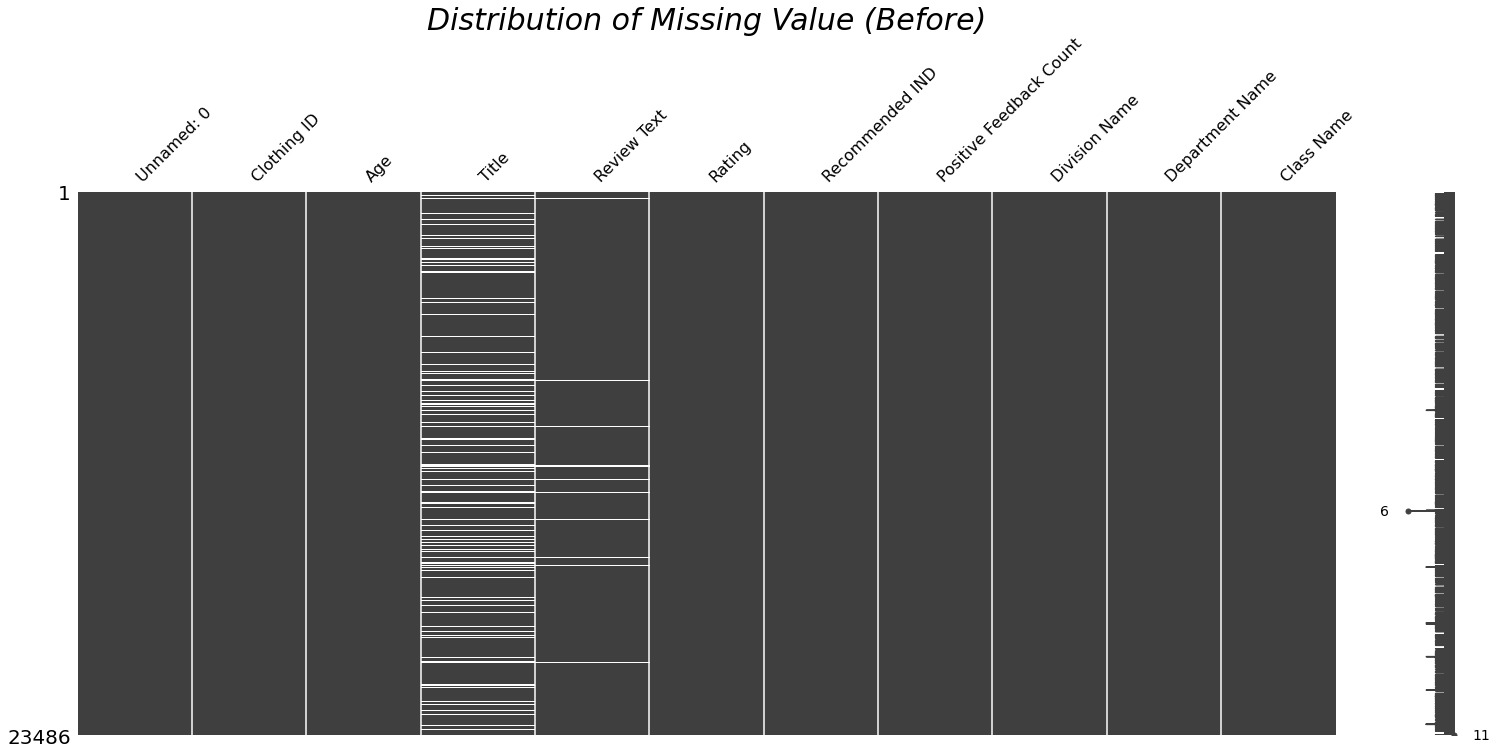

In [3]:
msno.matrix(df).set_title('Distribution of Missing Value (Before)',fontsize=30, fontstyle= 'oblique')

<h4> Now, we'll clean data by dropping and creating new column.</h4>

Shape of DataFrame:  (19662, 8)


Text(0.5, 1.0, 'Distribution of Missing Value (After)')

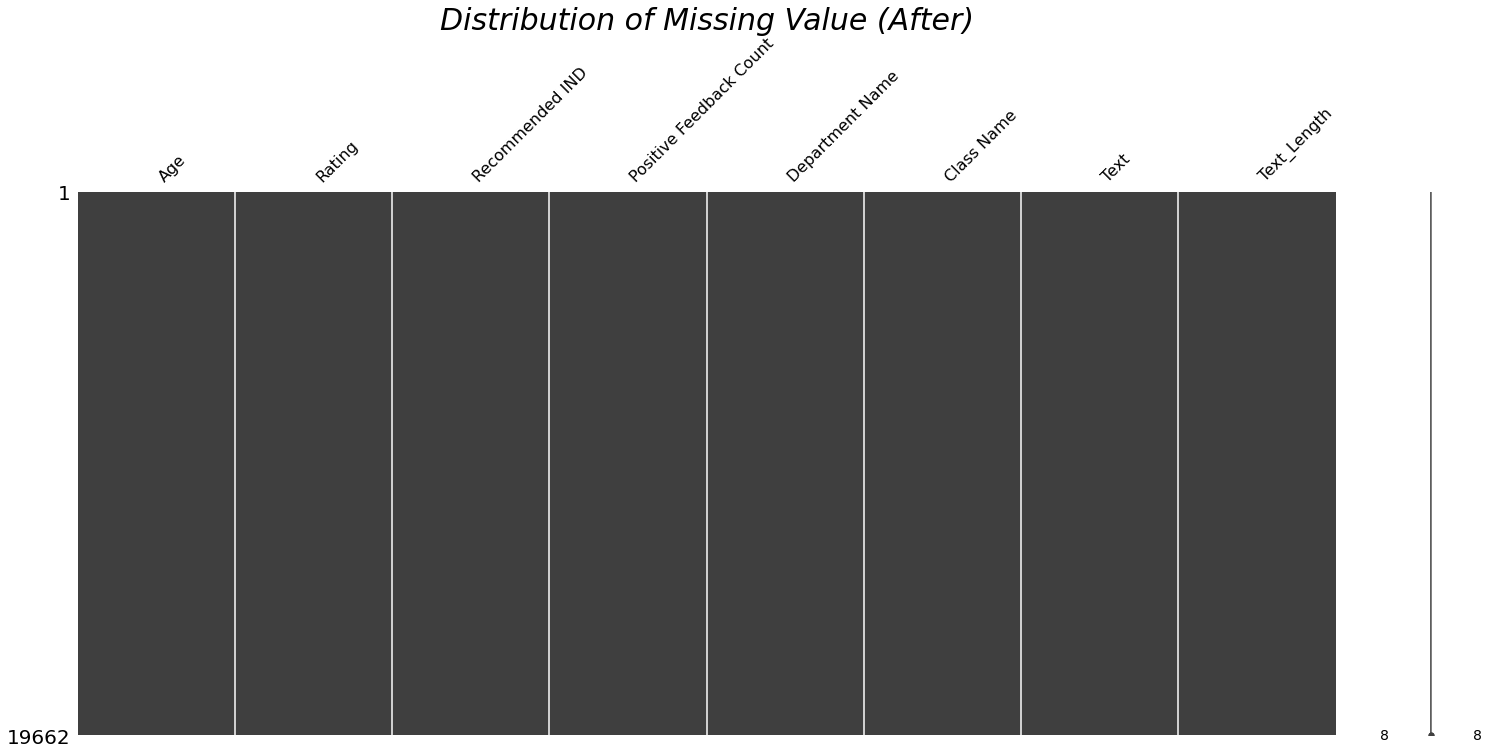

In [4]:
df.drop(['Unnamed: 0','Clothing ID'],axis=1,inplace=True)
df.dropna(subset=['Review Text','Division Name','Title'],inplace=True)
df['Text'] = df['Title'] + ' ' + df['Review Text']
df.drop(['Title','Review Text','Division Name'],axis=1,inplace=True)
df = df.reset_index().drop('index',axis=1)
df['Text_Length'] = df['Text'].apply(len)

print('Shape of DataFrame: ',df.shape)

msno.matrix(df).set_title('Distribution of Missing Value (After)',fontsize=30, fontstyle= 'oblique')

# <div style="text-align: center; background-color:#b2182b; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">2. Univariate Analysis</div>

<h4> Finally, we got 8 columns: <mark>5 numeric</mark> columns & <mark>3 categorical</mark> columns.</h4><br>


<h4>In this section, we'll explore each columns in the dataset to see the distributions of features, and to get some useful informations.</h4>
<h4>Mainly two parts in the section: Analysis on <u>categorical columns</u>; Analysis on <u>numeric columns</u>.</h4>

## <div style="text-align: left; background-color: #a33939; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:15px"> 2.1. Explore each Numeric Columns </div>

<h4>5 Numeric Columns in the DataFrame:</h4>

* 1.Age <br>
* 2.Rating <br>
* 3.Recommended IND <br>
* 4.Positive Feedback Count <br>
* 5.Text_Length <br>

<h4> We'll explore numeric columns in the dataset by plotting <mark>distplot</mark>, <mark>barplot</mark> and <mark>boxplot</mark>.</h4>

In [5]:
# describtion of 5 numeric columns
describe=df.describe(include =['float', 'int'])
describe.T.style.background_gradient(low=0.2,high=0.5,cmap = 'rocket_r')

,count,mean,std,min,25%,50%,75%,max
Age,19662.000000,43.260808,12.258122,18.000000,34.000000,41.000000,52.000000,99.000000
Rating,19662.000000,4.183145,1.112224,1.000000,4.000000,5.000000,5.000000,5.000000
Recommended IND,19662.000000,0.818177,0.385708,0.000000,1.000000,1.000000,1.000000,1.000000
Positive Feedback Count,19662.000000,2.652477,5.834285,0.000000,0.000000,1.000000,3.000000,122.000000
Text_Length,19662.000000,338.543739,144.724645,23.000000,217.000000,336.000000,496.000000,557.000000


## <div style="text-align: left; background-color:#d6604d; font-family:newtimeroman; color: white; padding: 8px; line-height: 1;border-radius:5px"> 2.1.1. Age Distribution</div>

<h4> "Age" refers to Positive Integer variable of the reviewers age.</h4>

In [6]:
age = df.Age.value_counts().sort_index()
age_range = [10*i for i in range(1,10)]
store = []
age_df = pd.DataFrame(columns=['count','age'])
for idx,count in enumerate(age_range):
    store.append([age[num] for idx, num in enumerate(age.index) if num >=count and num<=count+9])
age = [str(num)+'to'+str(num+9) for num in age_range]
age_df['count'] = [sum(num) for num in store]
age_df['age'] = age

In [7]:
hist_data = [df['Age']]
group_labels = ['Age Distribution']

# 1. distribution plot
fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False, colors=['#b2182b'])
fig1.update_layout(title = 'Age Distribution',template = "simple_white") 

# 2. bar plot
fig2 = px.bar(x = age_df['age'], 
              y = age_df['count'], 
              text = age_df['count'], color = age_df['age'],
              color_discrete_sequence = px.colors.sequential.RdBu,
              template = "simple_white",
              title = 'Age Bar Plot')

fig2.update_traces(width=0.7)

# marker line
idx = [num for num in range(2,5)]
for index in idx:
    fig2.data[index].marker.line.width = 2
    fig2.data[index].marker.line.color = "black"

fig1.update_layout(
    font=dict(size=17,family="Franklin Gothic"))
fig2.update_layout(
    xaxis_title="Age Range",
    yaxis_title="count",
    font=dict(size=17,family="Franklin Gothic"))

fig1.show()
fig2.show()

<h4> Age of customer mostly distributed in the range of <mark>30 to 59</mark></h4>

## <div style="text-align: left; background-color:#d6604d; font-family:newtimeroman; color: white; padding: 8px; line-height: 1;border-radius:5px"> 2.1.2. Rating & Recommended IND</div>

<h4> "Rating" refers to Positive Ordinal Integer variable for the <mark>product score</mark> granted by the customer from 1 Worst, to 5 Best;<br><br>"Recommended IND" refers to <mark>Binary variable</mark> stating where the customer recommends the product where 1 is recommended, 0 is not recommended.</h4>

In [8]:
rating = df['Rating'].value_counts()
# 2 subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

recommended = df['Recommended IND'].value_counts()
recommended = df['Recommended IND'].value_counts().sort_values(ascending=False)

# 1. Rating
fig.add_trace(go.Pie(values=rating.values,
             labels=rating.index, 
             marker=dict(colors=['#fddbc7','#f4a582','#d6604d','#b2182b','#67001f']),
             title= 'Rating',titlefont=dict(size=17)),row=1,col=1)

# 2. Recommended IND
fig.add_trace(go.Pie(values=recommended.values, 
             labels=recommended.index, 
             marker=dict(colors=['#fddbc7','#b2182b']),
             title= 'Recommended IND',titlefont=dict(size=17)),row=1,col=2)

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='black', width=0.2)))
fig.update_layout(
    font=dict(size=17,family="Franklin Gothic"))

<h4> 1.Rating: Here, we can notice that <mark>4 and 5</mark> rates account about <mark>77% of rating</mark>.<br><br>
    2.Recommended IND: About <mark>82.2% products</mark> are recommended in the dataset.</h4>

## <div style="text-align: left; background-color:#d6604d; font-family:newtimeroman; color: white; padding: 8px; line-height: 1;border-radius:5px"> 2.1.3. Positive Feedback Count</div>

<h4>"Positive Integer": documenting the number of other customers <mark>who found this review positive</mark>.</h4>

In [9]:
hist_data = [df['Positive Feedback Count']]
group_labels = ['Positive Feedback Count']

# 1. distribution plot
fig1 = ff.create_distplot(hist_data, group_labels,show_hist = False, colors = ['#b2182b'])
# 2. box plot
fig2 = px.box(df['Positive Feedback Count'],color_discrete_sequence=px.colors.sequential.RdBu,
              orientation='h')

fig1.update_layout(title = 'Positive Feedback Count Distribution',
                   font = dict(size=17, family = 'Franklin Gothic'),template = "simple_white") 
fig2.update_layout(title = 'Positive Feedback Count (Box Plot)',
                   font = dict(size=17, family = 'Franklin Gothic'),template = "simple_white")

fig1.show()
fig2.show()

## <div style="text-align: left; background-color:#d6604d; font-family:newtimeroman; color: white; padding: 8px; line-height: 1;border-radius:5px"> 2.1.4. Text Length by Recommended IND</div>

<h4> Here, we'll compare <mark>text length</mark> of recommended and not recommended comments:</h4>

In [10]:
recommended = df[df['Recommended IND'] == 1]
recommended_n = df[df['Recommended IND']==0]

hist_data = [recommended['Text_Length'], recommended_n['Text_Length']]
group_labels = ['Text of Recommended Comments','Text of Unrecommended Comments']

fig = ff.create_distplot(hist_data, group_labels,show_hist = False, colors=['#2166ac','#b2182b'])
fig.update_layout(title = 'Text Length by Recommended IND',
                  font = dict(size=17, family = 'Franklin Gothic'),template = "simple_white") 
fig.show()

<h4> Text of <mark>recommended comments</mark> are dsitributed along with higher length relatively.</h4>

## <div style="text-align: left; background-color: #a33939; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:15px"> 2.2. Categorical Columns </div>

<h4>3 Categorical Columns in the dataset:</h4>

*  1. Department Name
*  2. Class Name
*  3. Text

<h4> We'll explore categorical columns by plotting <mark>treemap</mark>, <mark>barplot</mark> and <mark>word cloud</mark>.</h4>


## <div style="text-align: left; background-color:#d6604d; font-family:newtimeroman; color: white; padding: 8px; line-height: 1;border-radius:5px"> 2.2.1. Category of clothes: Department Name & Class Name</div>

<h4>"Department Name" refers to categorical name of the product department name;<br><br>
    "Class Name" refers to categorical name of the product class name.<br><br>
    Since those two columns have <mark>inclusion relationship</mark>, we'll plot treemap on them:
</h4>

In [11]:
# treemap
fig = px.treemap(df, 
                 path=['Department Name','Class Name'],
                 title = ' Tree Map: Department & Class Name',
                 color_discrete_sequence=px.colors.sequential.RdBu,
                 width=1200, height=600)

fig.update_traces(textinfo='label+value', textfont_size=13,
                  marker=dict(line=dict(color='white', width=0.2)))
fig.update_layout(font = dict(size=17, family = 'Franklin Gothic'))
fig.show()

<h4>Class and Department name shown as above.</h4>

# <div style="text-align: left; background-color:#d6604d; font-family:newtimeroman; color: white; padding: 8px; line-height: 1;border-radius:5px"> 2.2.2. Text </div>

<h4> "Text" is a column which was combined with 'Title' and 'Rivew Text' previously.<br><br>
    Here, we'll explore Text by plotting <mark>bar plot</mark> and generating <mark>Word Cloud</mark>.
</h4>

In [12]:
# functions:

# get all of strings from sentences
def get_all_str(sentences):
    sentence = ''
    for words in sentences:
        sentence += words
    sentence = sentence.lower()
    return sentence

# get string from list
def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

# get word from text
def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result

# remove stopwords from list
def remove_stopword(lst):    
    stoplist = stopwords.words('english')
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
#     print(stoplist)
    return cleanwordlist

# lemmatize
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

# get frequency dataframe which consists of frequency and term
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title, mask):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=340,
               mask = mask,
               colormap= colormap,
               max_font_size=200,
               min_font_size = 1 ,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

#   function to preprocess
def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    frequency_df = Freq_df(lemmatize)
    return frequency_df

# preprocess -> get frequency dataframe -> plot Word Cloud
def create_wordcloud(column, title, color, mask):
    frequency_df = preprocess(column)
    data = frequency_df.set_index('Term').to_dict()['Frequency']
    Word_Cloud(data, 'white',color,title, mask)

In [13]:
# get picture
url = 'https://media.istockphoto.com/photos/woman-purple-dress-fashion-model-in-long-fluttering-gown-back-rear-picture-id1090972948?k=20&m=1090972948&s=612x612&w=0&h=56SBD2hFG03zOvfRaNOI_jLpsLuXQXjRmL7LOOo38Sw='
mask = np.array(Image.open(requests.get(url, stream=True).raw))

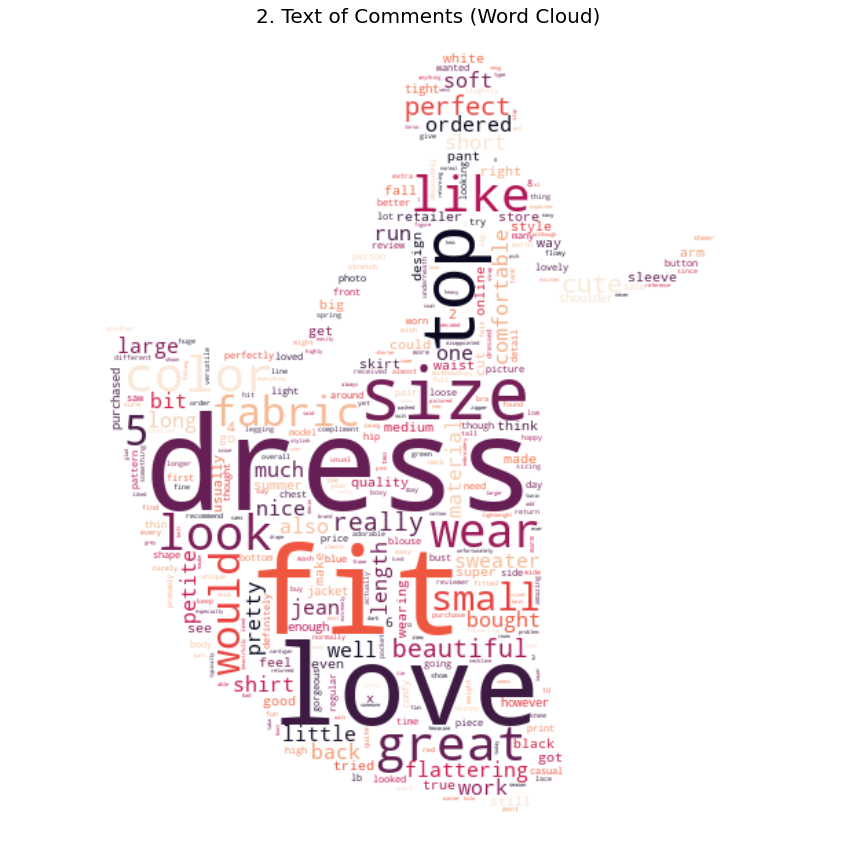

In [14]:
top10_frequent = preprocess(df['Text'])[:10]

# 1. bar plot
fig = px.bar(top10_frequent, 
             x = 'Term', y = 'Frequency',
             text = 'Frequency',
             color_discrete_sequence = px.colors.sequential.RdBu, 
             title = '1. Top 10 frequent terms (bar plot)', 
             color='Term',template = "simple_white")
fig.update_layout(font = dict(size=17, family = 'Franklin Gothic'))
fig.show()

# 2. Word Cloud
create_wordcloud(df['Text'],'2. Text of Comments (Word Cloud)','rocket', mask)

<h4>From above, it can be seen that <mark>top words</mark> are: "dress", "fit", "love"</h4>

# <div style="text-align: center; background-color:#b2182b; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 3. Department Name Analysis </div>

<h4> We'll do analysis on "Department Name" by "Age" and "Rate" <br><br>
    to see (1) whether consumer age would affect <mark>buying tendency</mark>, and (2) to explore which departments got <mark>high</mark> and <mark>low rate</mark>.</h4>

## <div style="text-align: left; background-color: #a33939; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:15px"> 3.1. Department by Age </div>

In [15]:
for idx in range(len(age_range)):
    df.loc[np.logical_and(df['Age']>=age_range[idx],df['Age']<=age_range[idx]+9), 'AgeGroup'] = age[idx]
df['Age'] = df['AgeGroup']
df.drop('AgeGroup',axis=1,inplace=True)

ten = df.groupby(['Age','Department Name']).size()['10to19']
twe = df.groupby(['Age','Department Name']).size()['20to29']
thi = df.groupby(['Age','Department Name']).size()['30to39']
fou = df.groupby(['Age','Department Name']).size()['40to49']
fif = df.groupby(['Age','Department Name']).size()['50to59']
six = df.groupby(['Age','Department Name']).size()['60to69']
sev = df.groupby(['Age','Department Name']).size()['70to79']
eig = df.groupby(['Age','Department Name']).size()['80to89']
nin = df.groupby(['Age','Department Name']).size()['90to99']
marker_color = ['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#d1e5f0','#92c5de','#4393c3','#2166ac']

In [16]:
# bar plot: Department by Age
fig = go.Figure(data=[
    go.Bar(name='10to19', 
           x=ten.index, y=ten.values/sum(ten),
           text=np.round(ten.values/sum(ten),2), 
           marker_color=marker_color[0]),
    
    go.Bar(name='20to29', x=twe.index, y=twe.values/sum(twe),
           text=np.round(twe.values/sum(twe),2), 
           marker_color=marker_color[1]),
    
    go.Bar(name='30to39', x=thi.index, y=thi.values/sum(thi),
           text=np.round(thi.values/sum(thi),2), 
           marker_color=marker_color[2]),
    
    go.Bar(name='40to49', x=fou.index, y=fou.values/sum(fou),
           text=np.round(fou.values/sum(fou),2), 
           marker_color=marker_color[3]),
    
        go.Bar(name='50to59', x=fif.index, y=fif.values/sum(fif),
           text=np.round(fif.values/sum(fif),2), 
               marker_color=marker_color[4]),
    
    go.Bar(name='60to69', x=six.index, y=six.values/sum(six),
           text=np.round(twe.values/sum(six),2), 
           marker_color=marker_color[5]),
    
    go.Bar(name='70to79', x=sev.index, y=sev.values/sum(sev),
           text=np.round(thi.values/sum(sev),2),
           marker_color=marker_color[6]),
    
    go.Bar(name='80to89', x=eig.index, y=eig.values/sum(eig),
           text=np.round(fou.values/sum(eig),2), 
           marker_color=marker_color[7]),
    
    go.Bar(name='90to99', x=nin.index, y=nin.values/sum(nin),
           text=np.round(nin.values/sum(nin),2), 
           marker_color=marker_color[8]),
])

fig.update_layout(xaxis_tickangle=-45, title='Department Name by Age',
                  font = dict(size=17, family = 'Franklin Gothic'), template = "simple_white")
fig.show()

<h4>Given bar plot above, younger people prefer to buy <mark>bottoms</mark> and <mark>dresses</mark>, <br><br>
    while older people prefer to buy <mark>tops</mark> and <mark>jackets</mark>. </h4>

## <div style="text-align: left; background-color: #a33939; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:15px"> 3.2. Department by Rate</div>

In [17]:
depart_rate = df.groupby(['Department Name','Rating']).size()
Bottoms = np.round(depart_rate['Bottoms'].values/depart_rate['Bottoms'].values.sum(),2)
Dresses = np.round(depart_rate['Dresses'].values/depart_rate['Dresses'].values.sum(),2)
Intimate = np.round(depart_rate['Intimate'].values/depart_rate['Intimate'].values.sum(),2)
Jackets = np.round(depart_rate['Jackets'].values/depart_rate['Jackets'].values.sum(),2)
Tops = np.round(depart_rate['Tops'].values/depart_rate['Tops'].values.sum(),2)
Trend = np.round(depart_rate['Trend'].values/depart_rate['Trend'].values.sum(),2)

In [18]:
fig = go.Figure()
categories = ['Rating: 1', 'Rating: 2', 'Rating: 3', 'Rating: 4', 'Rating: 5']
colors = ['#b2182b', '#d6604d', '#fddbc7', '#d1e5f0', '#4393c3']

# radar plot (just plot Jacket & Trend)

# fig.add_trace(go.Scatterpolar(
#              r = Bottoms, 
#              theta = categories,
#              fill = 'toself',
#              name = 'Bottoms',
#              ))
# fig.add_trace(go.Scatterpolar(
#              r = Dresses, 
#              theta = categories,
#              fill = 'toself',
#              name = 'Dresses',
#              ))
# fig.add_trace(go.Scatterpolar(
#              r = Intimate, 
#              theta = categories,
#              fill = 'toself',
#              name = 'Intimate',
#              ))

fig.add_trace(go.Scatterpolar(
             r = Jackets, 
             theta = categories,
             fill = 'toself',
             name = 'Jackets',
             ))

# fig.add_trace(go.Scatterpolar(
#              r = Tops, 
#              theta = categories,
#              fill = 'toself',
#              name = 'Tops',
#              ))

fig.add_trace(go.Scatterpolar(
             r = Trend, 
             theta = categories,
             fill = 'toself',
             name = 'Trend',
             ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      range=[0, 0.7]
    )),
  showlegend=True,
  title = '1. Department by Rating (Radar Plot)',
  font = dict(size=17, family = 'Franklin Gothic')
)
Department_name = df.groupby('Department Name').size()
Rating_5 = (df.groupby(['Rating','Department Name']).size()[5] / Department_name).sort_values(ascending=False)
Rating_4 = (df.groupby(['Rating','Department Name']).size()[4] / Department_name).sort_values(ascending=False)
Rating_3 = (df.groupby(['Rating','Department Name']).size()[3] / Department_name).sort_values(ascending=False)
Rating_2 = (df.groupby(['Rating','Department Name']).size()[2] / Department_name).sort_values(ascending=False)
Rating_1 = (df.groupby(['Rating','Department Name']).size()[1] / Department_name).sort_values(ascending=False)

# bar plot
fig2 = go.Figure(data=[
    go.Bar(name='Rating: 5', x=Rating_5.index, y=Rating_5.values,
           text=np.round(Rating_5.values,2), marker_color=colors[0]),
    go.Bar(name='Rating: 4', x=Rating_4.index, y=Rating_4.values,
           text=np.round(Rating_4.values,2), marker_color=colors[1]),
    go.Bar(name='Rating: 3', x=Rating_3.index, y=Rating_3.values,
           text=np.round(Rating_3.values,2), marker_color=colors[2]),
    go.Bar(name='Rating: 2', x=Rating_2.index, y=Rating_2.values,
           text=np.round(Rating_2.values,2), marker_color=colors[3]),
    go.Bar(name='Rating: 1', x=Rating_1.index, y=Rating_1.values,
           text=np.round(Rating_1.values,2), marker_color=colors[4]),
])

fig2.update_layout(xaxis_tickangle=-45, template = "simple_white", 
                   font = dict(size=17, family = 'Franklin Gothic'), title = '2. Depart by Rating (bar plot)')
fig.layout.template = 'none'

# fig.show()
# fig2.show()

In [19]:
# 1.radar plot
fig.show()
# 2. bar plot
fig2.show()

<h4><mark>Jacket and bottoms</mark> both have high ratings, with few low ratings, while <mark>the trends</mark> have few high ratings and many low ratings.</h4>

# <div style="text-align: center; background-color:#b2182b; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 4. Text by Recommended IND (Adjectives)</div>

<h4> We'll explore Text by whether it is recommended or not. Only <mark>adjectives</mark> are discussed here. </h4>

In [20]:
def pos_adjective(tagged):
    only_adjective = [word for word,pos in tagged if pos in ['JJ','JJR','JJS'
                                                          ]]
    stopwords = ['top']
    txt = ''
    for i in range(len(only_adjective)):
        txt += only_adjective[i]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stopwords] 
    return cleanwordlist

def preprocess_adj(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    tagged = nltk.pos_tag(lemmatize)
    postag = pos_adjective(tagged)
    frequency_df = Freq_df(postag)
    return frequency_df

def create_adj_wordcloud(column, title, color,mask):
    frequency_df = preprocess_adj(column)
    data = frequency_df.set_index('Term').to_dict()['Frequency']
    Word_Cloud(data, 'white',color,title,mask)

In [21]:
recommended_n = df[df['Recommended IND']==0]
recommended = df[df['Recommended IND']==1]

# get url
url = 'https://media.istockphoto.com/vectors/bright-red-christmas-sweater-in-cartoon-style-a-jumper-with-a-picture-vector-id1358084007?b=1&k=20&m=1358084007&s=612x612&w=0&h=_H0o30gk0zKrqMFdiuAFel1A-_kj87kUUBlPyIaNjHA='
mask = np.array(Image.open(requests.get(url, stream=True).raw))

<h4> Below is a bar plot and Word Cloud of <mark><b>not recommended</b></mark> text. </h4>

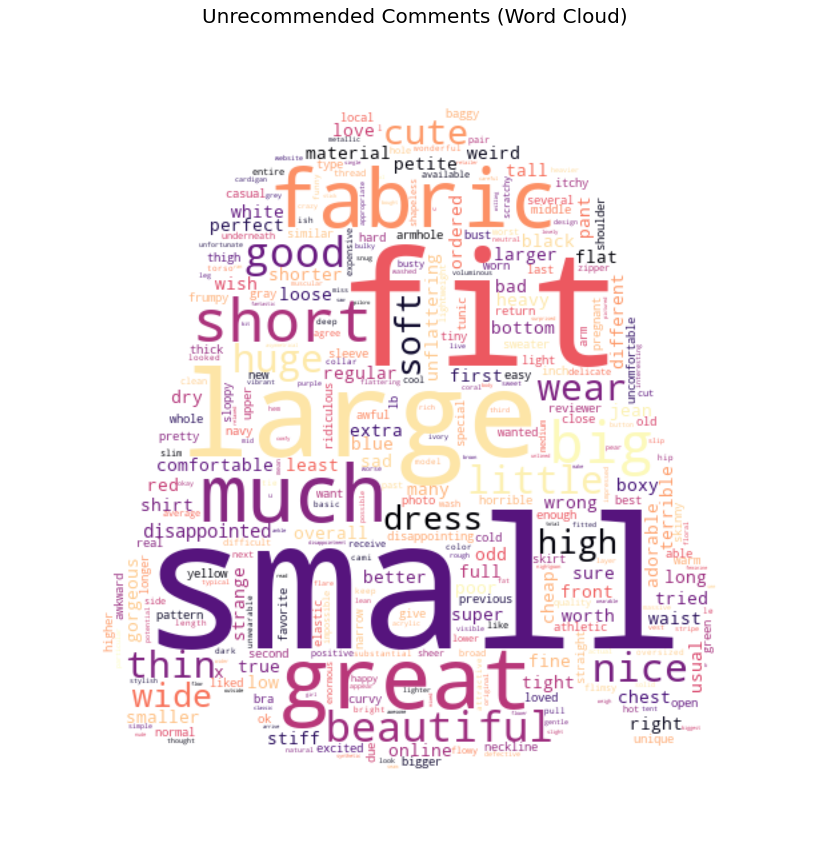

In [22]:
n_df = preprocess_adj(recommended_n['Text'])

# 1. bar plot: Top 20 to 29 frequent terms from comments of unrecommended products
fig = px.bar(x = n_df[20:29].Term, y = n_df[20:29].Frequency,
            color = n_df[20:29].Term,
            text = n_df[20:29].Frequency,
            color_discrete_sequence=px.colors.sequential.RdBu,
            title = 'Top 20~29 Comments of Unrecommended Products (Bar Plot)',
            template = 'simple_white')

idx = [0,1,8]

for index in idx:
    fig.data[index].marker.line.width = 4
    fig.data[index].marker.line.color = "black"
    
fig.update_layout(
    xaxis_title="Top 20~29 Unrecommended Comments",
    yaxis_title="count",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()

# 2. create Word Cloud
create_adj_wordcloud(recommended_n['Text'],'Unrecommended Comments (Word Cloud)','magma',mask)

<h4> From bar plot, we can see that there's some <mark>negative terms</mark> such as <u>'dissapointed'</u>, <u>'bad'</u> and <u>'poor'</u>. Also exist some other negative words in the Word Cloud.</h4>

<br><h4> Next, Recommended Text shown as below:</h4>

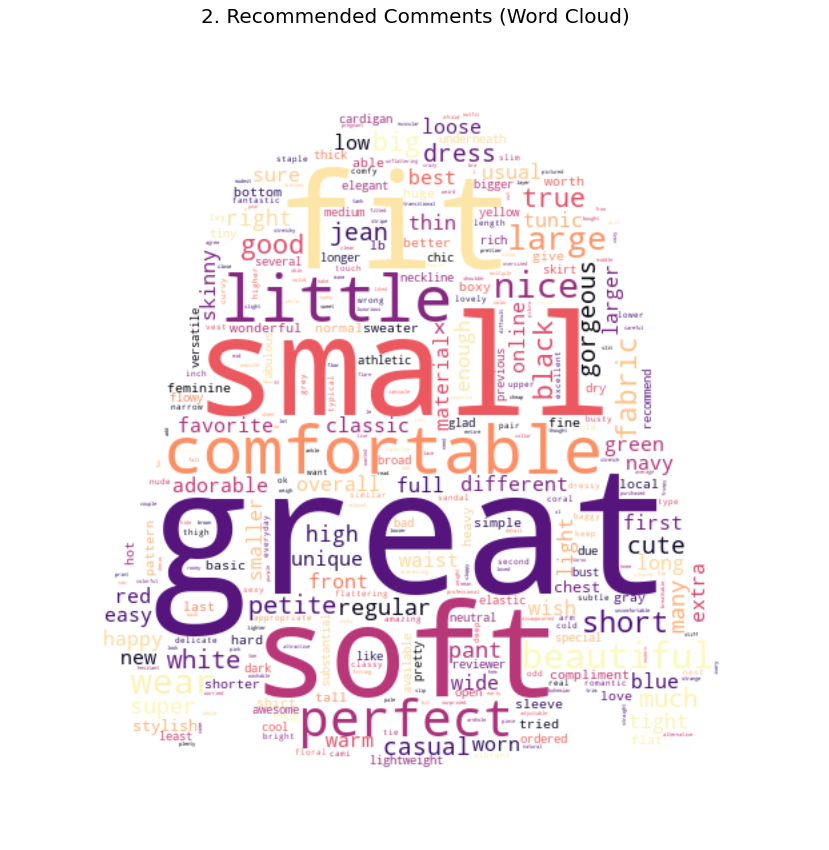

In [23]:
y_df = preprocess_adj(recommended['Text'])

# 1. bar plot: Top 1 to 10 frequent terms from comments of recommended products
fig = px.bar(x = y_df[:10].Term, y = y_df[:10].Frequency,
            color = y_df[:10].Term,
            text = y_df[:10].Frequency,
            color_discrete_sequence=px.colors.sequential.RdBu_r,
            title = '1. Top 10 Comments of Recommended Products (Bar Plot)',
            template = 'simple_white')

idx = [0,4,6,7,8]
for index in idx:
    fig.data[index].marker.line.width = 4
    fig.data[index].marker.line.color = 'black'


fig.update_layout(
    xaxis_title="Top 10 Recommended Comments",
    yaxis_title="count",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()

# 2. Word Cloud
create_adj_wordcloud(recommended['Text'],'2. Recommended Comments (Word Cloud)','magma',mask)

<h4>It is obvious that recommended comments largely contain <mark>positive terms</mark> such as 'great', 'comfortable', 'perfect' and 'beautiful'.</h4>

# <div style="text-align: center; background-color:#b2182b; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 5. Text Preprocessing </div>

<h4> Preprocess dataframe for classification. 4 parts here: </h4>


* 1. Define Preprocessing Funcion: remove stopwords and lemmatize it

* 2. Train_Test Split: split by ratio of 0.3

* 3. Tokenization, Sequencing and Padding



## <div style="text-align: left; background-color: #a33939; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:15px"> 5.1. Define Preprocessing Function </div>

<h4>Defined <mark>preprocess function</mark> which is to remove stopwords from sentences, and return lemmatized words, and apllied it to Text.</h4>

In [24]:
# preprocess: remove stopwords-> lemmatize
def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    return lemmatize

df['Text'] = df['Text'].apply(preprocess)

## <div style="text-align: left; background-color: #a33939; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:15px"> 5.2. Train-Test Split </div>

<h4>Split dataframe into train set and test set</h4>

In [25]:
y= df['Recommended IND']
X = df.drop('Recommended IND',axis=1)

# split by ratio of 0.3
train_X, test_X, train_y, test_y = train_test_split(X['Text'], y, test_size=0.3, random_state = 8888)    

## <div style="text-align: left; background-color: #a33939; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:15px"> 5.3. Tokenization, Sequencing and Padding</div>

<h4>First, get <mark>max length</mark> of text which will be used for padding</h4>

In [26]:
max_len = max(max(train_X.apply(len).values),max(test_X.apply(len).values))

In [27]:
# for tokenization
def fit_tokenizer(text, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

# for sequence, padding
def seq_padding(sentences, tokenizer, padding, truncating, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)    
    pad_trunc_sequences = pad_sequences(sequences, padding = padding, maxlen = maxlen, truncating=padding)
    return pad_trunc_sequences

<h4>Get new train_X and test_X which are done with <mark>sequencing and padding</mark>.</h4>

In [28]:
tokenizer = fit_tokenizer(train_X, "<OOV>")

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

train_X = seq_padding(train_X,tokenizer, 'post', 'post',max_len)
test_X = seq_padding(test_X,tokenizer, 'post', 'post', max_len) 

## <div style="text-align: left; background-color: #a33939; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:15px"> 5.4. GloVe Embedding </div>

<h4> GloVe is an unsupervised learning algorithm for obtaining vector representations for words. We'll use it for embedding during modeling </h4>

In [29]:
GLOVE_FILE = '../input/glove6b100dtxt/glove.6B.100d.txt'
GLOVE_EMBEDDINGS = {}

with open(GLOVE_FILE) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        GLOVE_EMBEDDINGS[word] = coefs

<h4> How many missing words ? </h4>

In [30]:
EMBEDDINGS_MATRIX = np.zeros((VOCAB_SIZE+1, 100))

num = 0
missed_list = []

for word, i in word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector
    else:
        num += 1
        missed_list.append(word)

print('How many missed words? ',num)
print('As example: ',missed_list[:10])

How many missed words?  1577
As example:  ['<OOV>', 'pilcro', 'armhole', '34d', '0p', 'xsp', '36d', '34dd', '32dd', '135lbs']


# <div style="text-align: center; background-color:#b2182b; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 6. Text Classification (LSTM Model)</div>

<h4> LSTM is an artificial neural network used in the fields of artificial intelligence and deep learning. - wikipedia.</h4>
<h4> 2 main sections here: </h4>

* 1. Define & Train Model

* 2. Model Evaluation

## <div style="text-align: left; background-color: #a33939; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:15px"> 6.1. Define & Train Model </div>

<h4>Here, we'll use <mark>bidirectional LSTM</mark>, and use <mark>dropout</mark> & <mark>regularizers</mark> to avoid overfitting.</h4>

In [31]:
# define model
def LSTM_model(vocab_size, embedding_dim, maxlen, embeddings_matrix):
    
    model = Sequential()
    
    model.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen, weights = [embeddings_matrix],trainable=False))
    model.add(Bidirectional(LSTM(64,kernel_regularizer=keras.regularizers.l2(0.001))))
    model.add(Dropout(0.3))
    
    tf.keras.layers.GlobalAveragePooling1D()

    model.add(Dense(6, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics = ['AUC']) 
    return model

In [32]:
# fitting
model = LSTM_model(VOCAB_SIZE, 100, max_len, EMBEDDINGS_MATRIX)

history = model.fit(train_X, train_y, epochs = 60, batch_size = 128, validation_data=(test_X, test_y))

Epoch 1/60
108/108 [==============================] - 7s 20ms/step - loss: 0.8306 - auc: 0.5095 - val_loss: 0.7237 - val_auc: 0.6090
Epoch 2/60
108/108 [==============================] - 1s 12ms/step - loss: 0.7231 - auc: 0.5592 - val_loss: 0.6650 - val_auc: 0.7355
Epoch 3/60
108/108 [==============================] - 1s 12ms/step - loss: 0.6416 - auc: 0.6846 - val_loss: 0.5621 - val_auc: 0.8374
Epoch 4/60
108/108 [==============================] - 1s 12ms/step - loss: 0.5669 - auc: 0.7893 - val_loss: 0.5456 - val_auc: 0.8644
Epoch 5/60
108/108 [==============================] - 1s 12ms/step - loss: 0.5340 - auc: 0.8159 - val_loss: 0.4843 - val_auc: 0.8828
Epoch 6/60
108/108 [==============================] - 1s 12ms/step - loss: 0.5052 - auc: 0.8371 - val_loss: 0.4658 - val_auc: 0.8855
Epoch 7/60
108/108 [==============================] - 1s 12ms/step - loss: 0.4843 - auc: 0.8513 - val_loss: 0.4486 - val_auc: 0.8899
Epoch 8/60
108/108 [==============================] - 1s 12ms/step - 

trained successfully

## <div style="text-align: left; background-color: #a33939; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:15px"> 6.2. Model Evaluation</div>


<h4> Two Parts: </h4>

* 1. Compare AUC & Loss Score

* 2. Compare Each Scores

## <div style="text-align: left; background-color:#d6604d; font-family:newtimeroman; color: white; padding: 8px; line-height: 1;border-radius:5px"> 6.2.1. Compare AUC & Loss Score</div>

<h4> Explore AUC and Loss scores by plotting line charts: </h4>

In [33]:
epoch = [x for x in range(1,61)]

color = ['#67001f','#b2182b','#4393c3','#2166ac']

fig1 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['auc'],line_color=color[0],name='1.auc score'),
    
    go.Line(x = epoch, y = history.history['val_auc'],line_color=color[3],name='2.val_auc score')
])

fig2 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['loss'],line_color = color[1],name='3.loss'),
    
    go.Line(x = epoch, y = history.history['val_loss'], line_color = color[2],name='4.val_loss')
])

figures = [fig1,fig2]
title = ['AUC & val_AUC Score','Loss & Val_Loss Score']
fig = make_subplots(cols=len(figures),
                   subplot_titles=(title[0], title[1])) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)
        
fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)

fig.update_yaxes(title_text="AUC", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(template = "simple_white", title = 'AUC & LOSS',
                 font = dict(size=17, family = 'Franklin Gothic'))

/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## <div style="text-align: left; background-color:#d6604d; font-family:newtimeroman; color: white; padding: 8px; line-height: 1;border-radius:5px"> 6.2.2. Compare each Scores </div>

<h4> Accuracy, Precision, Recall, F1, AUC </h4>

In [34]:
# test probability
test_predict_proba = model.predict(test_X, verbose=0)
# test predicted label
test_prediction_label = (model.predict(test_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(test_y, test_prediction_label)
precision = precision_score(test_y, test_prediction_label)
recall = recall_score(test_y, test_prediction_label)
f1 = f1_score(test_y, test_prediction_label)
AUC = roc_auc_score(test_y, test_predict_proba)

# get list of test scores
test_score_list = [accuracy, precision, recall, f1, AUC]

In [35]:
# test probability
train_predict_proba = model.predict(train_X, verbose=0)
# test predicted label
train_prediction_label = (model.predict(train_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(train_y, train_prediction_label)
precision = precision_score(train_y, train_prediction_label)
recall = recall_score(train_y, train_prediction_label)
f1 = f1_score(train_y, train_prediction_label)
AUC = roc_auc_score(train_y, train_predict_proba)

# get list of train scores
train_score_list = [accuracy, precision, recall, f1, AUC]

In [36]:
score_name = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
fig = go.Figure(data=[
    go.Bar(name='Train Scores', 
           x=score_name, y=train_score_list,
           text=np.round(train_score_list,3),marker_color='#67001f'),
    go.Bar(name='Test Scores', 
           x=score_name, y=test_score_list,
           text=np.round(test_score_list,3),marker_color='#fddbc7')
])
fig.update_layout(template = 'simple_white', title = 'Comparison of Train Scores & Test Scores')

fig.update_layout(
    xaxis_title="scoring metrix",
    yaxis_title="score",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()

<h4> Train & Test Score's <mark>Accuracy, Precision, Recall, F1, AUC score</mark> shown as above.</h4>


## <div style="text-align: center; background-color:#ECF0F1 ; font-family:newtimeroman; color: black; padding: 40px; line-height: 1;border-radius:40px"> 🙇Thank You For Watching ! -WONDUK<br><br>Please upvote if you like this notebook !</div>